In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.combine import SMOTEENN 
from sklearn.linear_model import LogisticRegression

The Dataset contains information on policyholders having the attributes like policy tenure, age of the car, age of the car owner, the population density of the city, make and model of the car, power, engine type, etc, and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

In [170]:
link1 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/test%202.csv"
link2 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/train%202.csv"
link3 = "https://raw.githubusercontent.com/lilyhuong/Car-Insurance-Claim-Prediction/master/sample_submission.csv"

In [171]:
df = pd.read_csv(link2)
test = pd.read_csv(link1)
submission = pd.read_csv(link3)

In [173]:
test.shape

(39063, 44)

In [174]:
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


First, we will concatenate 2 dataframes into one dataframe to be easier to change the value of split train - test 

In [175]:
# df = result = pd.concat([df1, df2], ignore_index = True )

In [176]:
df

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


our final dataframe have 97655 observations and 44 variables 

In next step, we will drop some columns that is not important for our estimation

In [177]:
len(np.unique(df["area_cluster"].values))

22

In [178]:
df.area_cluster.value_counts()

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64

We have total 22 difference category for this variable, I will drop this column. Variable policy_id do not have any impact on the result of our estimation, therefore I will drop this column too

In [179]:
df = df.drop(["area_cluster", "policy_id"], axis = 1)

In [180]:
df.shape

(58592, 42)

In [181]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


## Min Max normalization in data mining

"Feature scaling" est une méthode utilisée pour normaliser la gamme des variables indépendantes

Par example, si on dispose de plusieurs variables indépendantes telles que population_density, displacement; avec leurs plages respectives de ... , (25 000-75 000 euros), la mise à l'échelle des caractéristiques les aiderait à se trouver toutes dans la même plage, par exemple centrée autour de 0 ou dans la plage (0,1) selon la technique de mise à l'échelle.

In [182]:
scaler = MinMaxScaler()
df['population_density'] = scaler.fit_transform(df['population_density'].values.reshape(-1, 1))
df['displacement'] = scaler.fit_transform(df['displacement'].values.reshape(-1, 1))
df['length'] = scaler.fit_transform(df['length'].values.reshape(-1, 1))
df['width'] = scaler.fit_transform(df['width'].values.reshape(-1, 1))
df['height'] = scaler.fit_transform(df['height'].values.reshape(-1, 1))
df['gross_weight'] = scaler.fit_transform(df['gross_weight'].values.reshape(-1, 1))

Because we want to use the varianble "policy_tenure" presents for the number month of in a contract to get the probability of a policy with high risk of claim in 6 month, therefore we will use min max scaler for this variable

In [183]:
df['policy_tenure'] = scaler.fit_transform(df['policy_tenure'].values.reshape(-1, 1))

Text(0.5, 1.0, 'Distribution of average age by model')

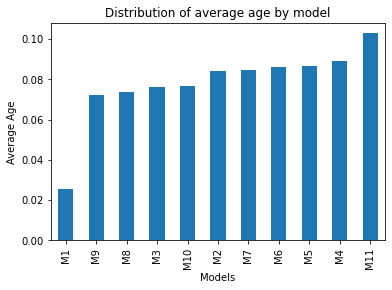

In [184]:
df.groupby("model")["age_of_car"].mean().sort_values().plot(kind="bar")
plt.xlabel("Models")
plt.ylabel("Average Age")
plt.title("Distribution of average age by model")

<AxesSubplot:>

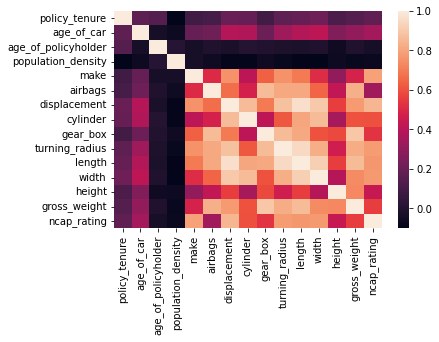

In [185]:
correlation = df.select_dtypes("number").drop("is_claim", axis=1).corr()
sns.heatmap(correlation)

## Checking Outliers 


In [187]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


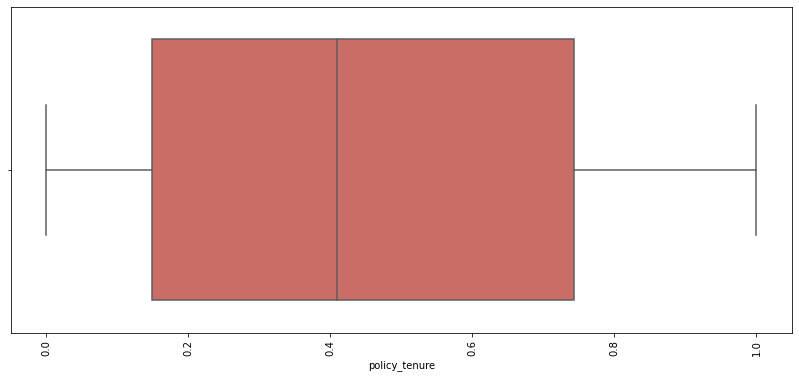

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


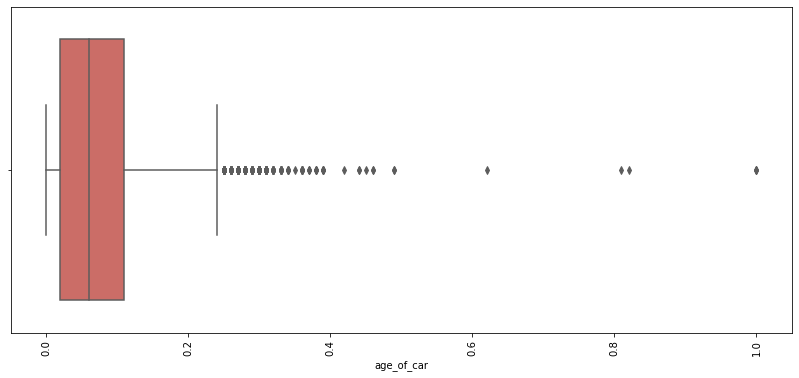

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


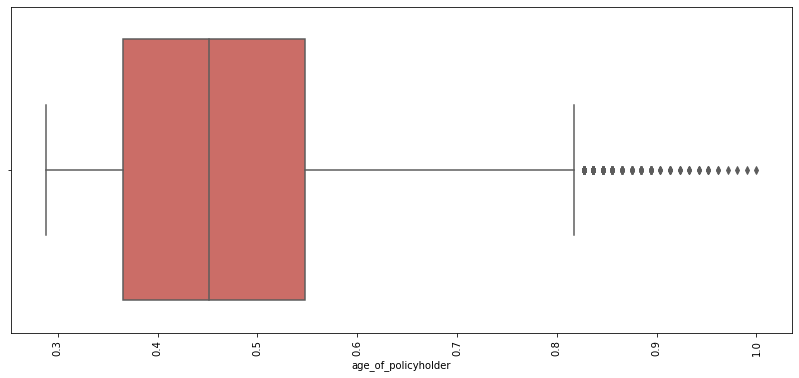

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


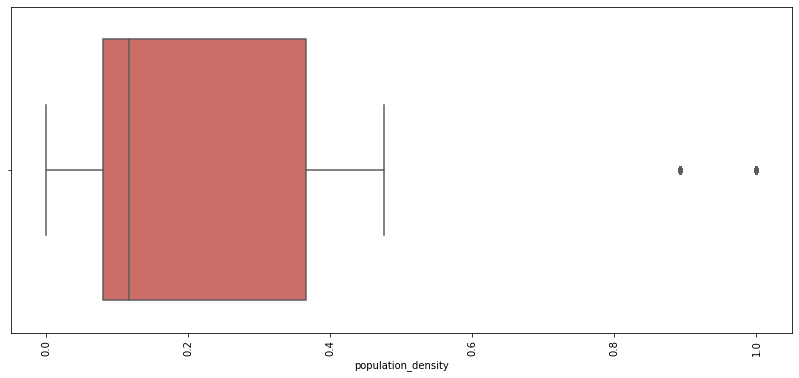

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


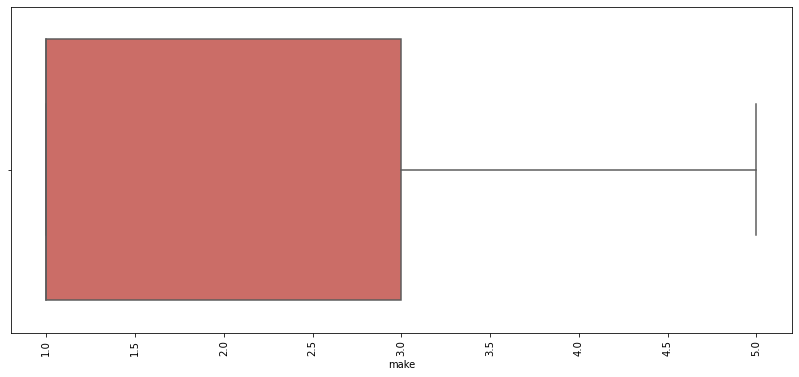

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


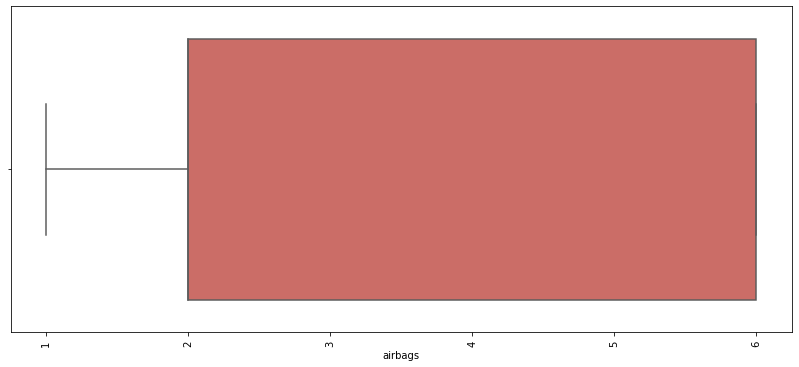

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


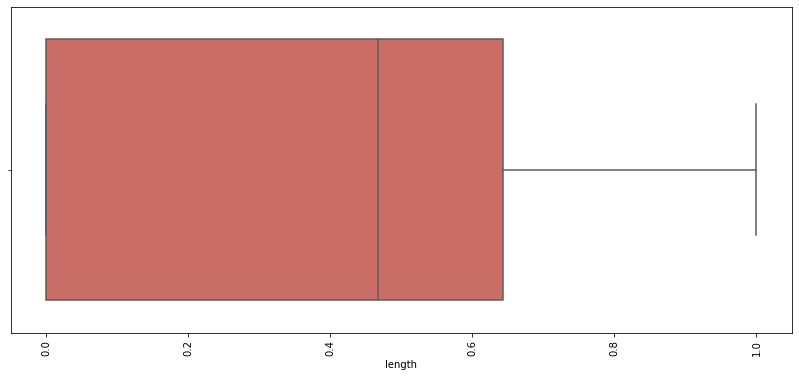

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


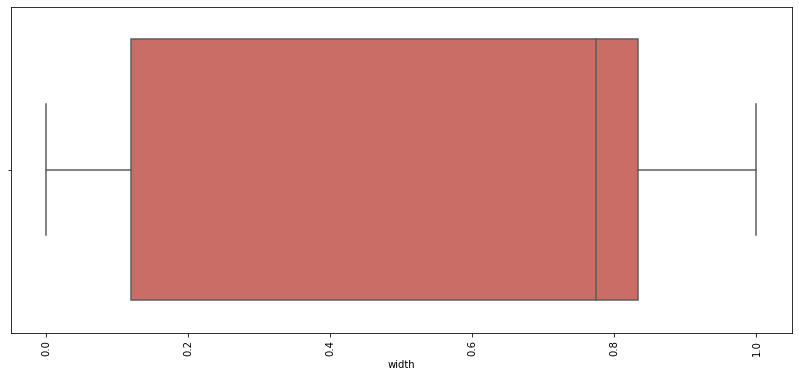

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


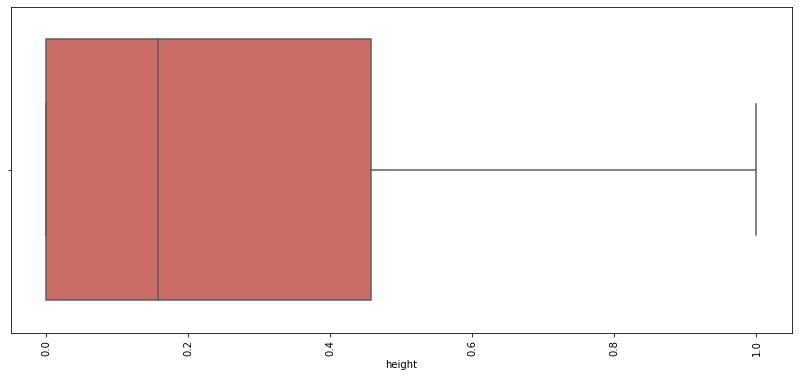

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


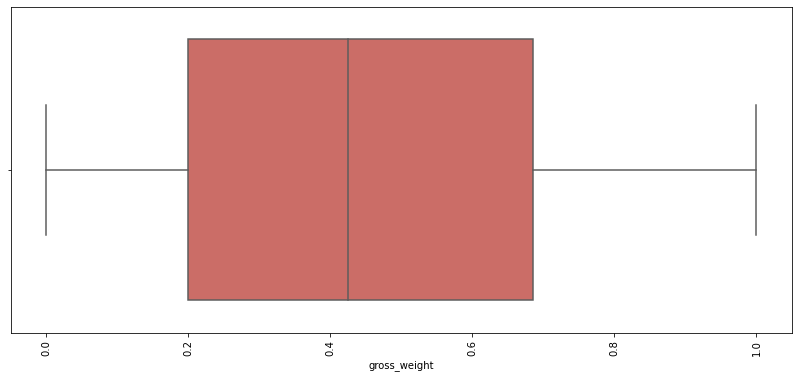

In [189]:
list_boxlot = ['policy_tenure', 'age_of_car', 'age_of_policyholder','population_density', "make",'airbags', 'length', 'width', 'height', 'gross_weight' ]
for i in list_boxlot:
    plt.figure(figsize= (14,6))
    sns.boxplot(df[i], data = df, palette = "hls")
    plt.xticks (rotation = 90)
    plt.yticks (rotation = 90)
    plt.show()


In [190]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

policy_tenure          0.594627
age_of_car             0.090000
age_of_policyholder    0.182692
population_density     0.285630
make                   2.000000
airbags                4.000000
displacement           0.992877
cylinder               1.000000
gear_box               0.000000
turning_radius         0.400000
length                 0.643275
width                  0.714286
height                 0.457143
gross_weight           0.485800
ncap_rating            3.000000
is_claim               0.000000
dtype: float64


Remove the outliers in our data set

## Check the non integer variable (object) in our data

In [ ]:
df.select_dtypes("object").nunique()

Replace all columns with "No" value to 0, "yes" value to 1

In [ ]:
df = df.replace("No", 0)
df = df.replace("Yes", 1)

In [ ]:
df

In [ ]:
df["segment"].unique()

In [ ]:
len(df[df.segment == "Utility"].index)/len(df.index)

In [ ]:
dict_segment = {"A":1, "B1":2, "B2":3, "C1":4, "C2":5, "Utility":6}
df.replace({"segment": dict_segment},inplace=True)

In [ ]:
df["rear_brakes_type"].unique()

## One hot coding

In [ ]:
def data_preprocessor(df):
    
    #Clean max_torque and max_power cols
    df["max_torque_Nm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*Nm)").astype('float64')
    df["max_torque_rpm"] = df["max_torque"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')
    
    df["max_power_bhp"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*bhp)").astype('float64')
    df["max_power_rpm"] = df["max_power"].str.extract(r"([-+]?[0-9]*\.?[0-9]+)(?=\s*rpm)").astype('float64')

    #Drop original cols
#    df.drop(["max_torque","max_power"],axis=1,inplace=True)

data_preprocessor(df)

In [ ]:
df["max_torque_Nm"] = scaler.fit_transform(df["max_torque_Nm"].values.reshape(-1, 1))
df["max_torque_rpm"] = scaler.fit_transform(df["max_torque_rpm"].values.reshape(-1, 1))
df["max_power_bhp"] = scaler.fit_transform(df["max_power_bhp"].values.reshape(-1, 1))
df["max_power_rpm"] = scaler.fit_transform(df["max_power_rpm"].values.reshape(-1, 1))

In [ ]:
#for i in ['fuel_type', 'rear_brakes_type', 'transmission_type', "steering_type", "model", "max_torque", "max_power", "engine_type"]:
for i in ['fuel_type', 'rear_brakes_type', 'transmission_type', "steering_type", "model", "engine_type"]:
    df[i] = df[i].astype('category')


df = pd.concat([pd.get_dummies(df['fuel_type'], prefix = 'fuel_type'),
                pd.get_dummies(df['rear_brakes_type'], prefix = 'rear_brakes_type'), 
                pd.get_dummies(df['transmission_type'], prefix = 'transmission_type'),
                pd.get_dummies(df['steering_type'], prefix = 'steering_type'),
                pd.get_dummies(df['model'], prefix = 'model'),
                #pd.get_dummies(df["max_torque"], prefix = "max_torque"),
                #pd.get_dummies(df["max_power"], prefix = "max_power"),
                pd.get_dummies(df["engine_type"], prefix = "engine_type"),
                df],axis = 1)
df.drop(['fuel_type'],axis=1, inplace=True)
df.drop(['rear_brakes_type'],axis=1, inplace=True)
df.drop(['transmission_type'],axis=1, inplace=True)
df.drop(['steering_type'],axis=1, inplace=True)
df.drop(['model'],axis=1, inplace=True)
df.drop(["max_torque"],axis=1, inplace=True)
df.drop(["max_power"],axis=1, inplace=True)
df.drop(["engine_type"],axis=1, inplace=True)

df.head()

In [ ]:
sns.countplot(df["is_claim"])

## Resampling

In [ ]:
X = df.drop(columns = "is_claim")
y = df["is_claim"]

In [ ]:
smt = SMOTEENN()
X, y = smt.fit_resample(X, y)

In [ ]:
sns.countplot(y)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [ ]:
pca = PCA()
X_reduced = pca.fit_transform(X)


cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

regr = LogisticRegression( )
mse = []

# MSE 
score = -1*model_selection.cross_val_score(regr, np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

for i in np.arange(1, 30):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [ ]:
mse.index(min(mse))

## Prediction

In [ ]:
pca = PCA(n_components = 14)
X_reduced = pca.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y, test_size=0.20)

In [ ]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

preds = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression( )
classifier1.fit( X_train_red, y_train_red )
y_pred_1 = classifier1.predict( X_test_red)

cm1 = confusion_matrix( y_test_red, y_pred_1 )
print("Accuracy on Test Set for LogReg = %.2f" % ((cm1[0,0] + cm1[1,1] )/len(X_test)))

In [ ]:
accuracy_score(y_test,preds) 

In [ ]:
print(classification_report(y_test, preds))